<a href="https://colab.research.google.com/github/niksche/Diploma-thesis-Designing-communications-satellite-/blob/master/antenna-reflector-dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the system of differential equations.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,z1,x2,z2]
        t :  time
        p :  vector of the parameters:
                  p = [m, mu, k, L]
    """
    x1, z1, x2, z2 = w
    m, mu, k, L = p
  
    # Create f = (x1',y1',x2',y2'):
    f = [z1,
         (-mu * z1 -2*k*x1 + k*x2) / m,
         z2,
         (-mu * z2 + k * x1 - k * x2 + k*L)/m
         ]
    return f
    

In [8]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m = 1.0


# Natural lengths
L = 0.5


# Spring coefficients
k = 8.0

W0 = 1

k = 2 * W0 / L**2

# Friction coefficients
mu = 0.8

# Initial conditions
# x1 and x2 are the initial displacements; z1 and z2 are the initial velocities
x1 = 0.0
z1 = 0.0
x2 = 0.2
z2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m, mu, k, L]
w0 = [x1, z1, x2, z2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('reflector-dynamics.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

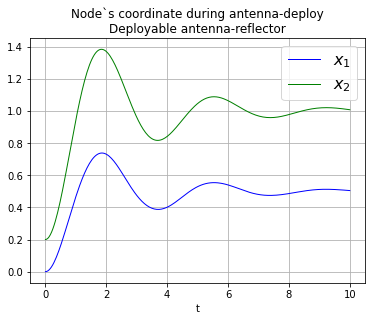

In [12]:
from numpy import loadtxt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

t, x1, z1, x2, z2 = loadtxt('reflector-dynamics.dat', unpack=True)

plt.figure(1, figsize=(6, 4.5))

plt.xlabel('t')
plt.grid(True)
# plt.hold(True)
lw = 1

plt.plot(t, x1, 'b', linewidth=lw)
plt.plot(t, x2, 'g', linewidth=lw)

plt.legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
plt.title('Node`s coordinate during antenna-deploy\nDeployable antenna-reflector')
plt.savefig('reflector\`s_coordinates.png', dpi=100)




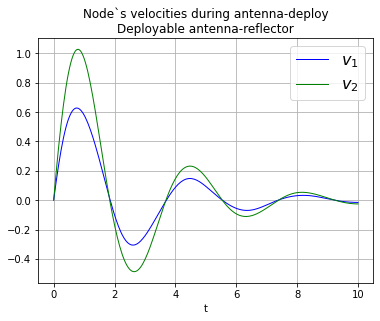

In [13]:

plt.figure(1, figsize=(6, 4.5))

plt.xlabel('t')
plt.grid(True)
# plt.hold(True)
lw = 1

plt.plot(t, z1, 'b', linewidth=lw)
plt.plot(t, z2, 'g', linewidth=lw)

plt.legend((r'$v_1$', r'$v_2$'), prop=FontProperties(size=16))
plt.title('Node`s velocities during antenna-deploy\nDeployable antenna-reflector')
plt.savefig('reflector\`s_velocities.png', dpi=100)


In [17]:
import matplotlib.animation as animation
# Plot the solution that was generated
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from matplotlib import rc
rc('animation', html='jshtml')


[0, 0, 0, 0, 0] [0, 0, 0.0012759105380718068, 0, 0.20191420968215607]
[0.0006379552690359034, 0] [0.10159506011011393, 0]


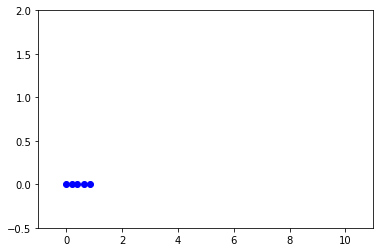

In [19]:
fig = plt.figure()
ax = plt.axes(xlim=(-1, 11), ylim=(-0.5, 2))
a = [0, 0,x1[1],0, x2[1]] , [0,0,0, 0,0]
print(a[1], a[0]);
line, = ax.plot( a[0], a[1] ,'bo')
# # line2, = ax.plot( x2[1], 0 ,'bo')


def middle(left, right):
    return [(right[0]-left[0])/2 + left[0], 0]



def init():
    middle1 = middle([0,0], [x1[0], 0])
    middle2 = middle([x1[0], 0], [x2[0], 0])
    line.set_data( [0,middle1[0],x1[0],middle2[0], x2[0]] , [0,0 ,0,0,0])
    # line.set_data(x2[0], 0)
    return line,


middle1 = middle([0,0], [x1[1], 0])
middle2 = middle([x1[1], 0], [x2[1], 0])

print(middle1, middle2)

# animation function.  This is called sequentially
def animate(i):
    middle1 = middle([0,0], [x1[i], 0])
    middle2 = middle([x1[i], 0], [x2[i], 0])
    line.set_data( [0,middle1[0], x1[i],middle2[0], x2[i]] , [0,0,0,0,0])
    # line.set_data(x2[i],0)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)


anim
